<a href="https://colab.research.google.com/github/francomanca93/fundamentos-de-estadistica-con-python/blob/analisis-exploratorio/2.%20Caracterizar%20informaci%C3%B3n%20a%20traves%20del%20an%C3%A1lisis%20exploratorio/5_Visualizaci%C3%B3n_de_datos_usando_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos usando Python

Montamos drive para acceder a la base de datos con la cual vamos a trabajar

In [2]:
#Montamos Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
ls '/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos/'

bicicletas-compartidas.csv  datos_profesora.py  __pycache__/


In [5]:
cd '/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos/'

/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos


In [6]:
df = pd.read_csv('bicicletas-compartidas.csv')

## Variables categóricas

In [7]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [8]:
y = df['cuartil-ano'].apply(lambda x: 'cuartil-' + str(int(x)))

### Grafico de barra

Un [diagrama de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras), también conocido como gráfico de barras o gráfico de columnas, es una forma de representar gráficamente un conjunto de datos o valores mediante barras rectangulares de longitud proporcional a los valores representados. Los gráficos de barras pueden ser usados para comparar cantidades de una variable en diferentes momentos o diferentes variables para el mismo momento. Las barras pueden orientarse horizontal y verticalmente. 

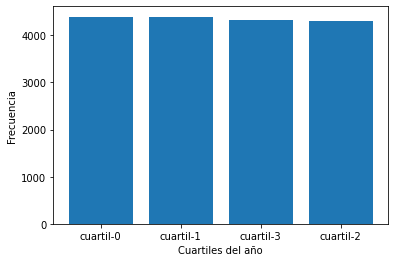

In [9]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')
plt.show()

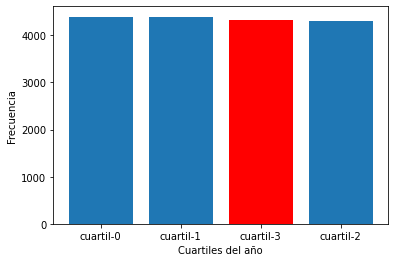

In [10]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')
ax.patches[2].set_facecolor('red')
plt.show()

### Grafico circular

Un [gráfico circular](https://es.wikipedia.org/wiki/Gr%C3%A1fico_circular) o gráfica circular, también llamado "gráfico de pastel", "gráfico de tarta", "gráfico de torta" o "gráfica de 360 grados", se utiliza para representar porcentajes y proporciones. El número de elementos comparados dentro de una gráfica circular suele ser de más de cuatro. 

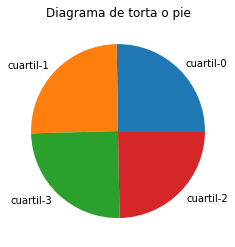

In [11]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels=y.value_counts().index)
ax.set_title('Diagrama de torta o pie')
plt.show()

## Variables numericas

### Histograma

Un [histograma](https://es.wikipedia.org/wiki/Histograma) es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua (como la longitud o el peso).

Se utilizan para relacionar variables cuantitativas continuas. Para variables cuantitativas discretas las barras se dibujan separadas y el gráfico se llama diagrama de frecuencias, porque la variable representada en el eje horizontal ya no representa un espectro continuo de valores, sino valores cuantitativos específicos, igual que ocurre en un diagrama de barras, usado para representar una característica cualitativa o categórica. Su utilidad se hace más evidente cuando se cuenta con un gran número de datos cuantitativos y que se han agrupado en intervalos de clase.

In [12]:
y_viento = df['viento']

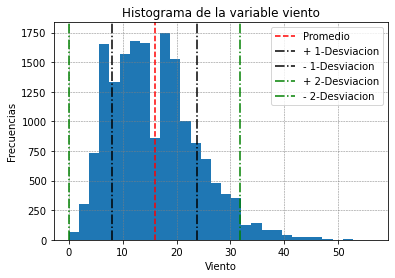

In [13]:
fig, ax = plt.subplots()
ax.hist(y_viento, bins=30)
ax.set_xlabel('Viento')
ax.set_ylabel('Frecuencias')

plt.axvline(np.mean(y_viento), c='r', linestyle='--', label='Promedio')

plt.axvline(np.mean(y_viento) + np.std(y_viento), c='k', linestyle='-.', label='+ 1-Desviacion')
plt.axvline(np.mean(y_viento) - np.std(y_viento), c='k', linestyle='-.', label='- 1-Desviacion')

plt.axvline(np.mean(y_viento) + 2*np.std(y_viento), c='g', linestyle='-.', label='+ 2-Desviacion')
plt.axvline(np.mean(y_viento) - 2*np.std(y_viento), c='g', linestyle='-.', label='- 2-Desviacion')

ax.set_title('Histograma de la variable viento')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.legend(loc='best')
plt.show()

### Boxplot

El [diagrama de caja o boxplot](https://es.wikipedia.org/wiki/Diagrama_de_caja) es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, el diagrama de caja muestra a simple vista la mediana y los cuartiles de los datos,​ pudiendo también representar los valores atípicos de estos. 

![Elementos de boxplot](https://upload.wikimedia.org/wikipedia/commons/4/4a/Diagrama_de_caja.jpg)

El diagrama de caja es compuesto de los siguientes elementos:

- Rango (sin datos atípicos)
- Datos atípicos.
- Rango intercuartil (también conocido como RIC)
- Cuartiles (denotados como Q1, Q2 y Q3)
- Mediana (Q2)
- Mínimo y máximo.

Utilidad

- Proporcionan una visión general de la simetría de la distribución de los datos; si la mediana no está en el centro del rectángulo, la distribución no es simétrica.
- Son útiles para ver la presencia de valores atípicos también llamados outliers.
- Pertenece a las herramientas de las estadística descriptiva. Permite ver como es la dispersión de los puntos con la mediana, los percentiles 25 y 75 y los valores máximos y mínimos.
- Ponen en una sola dimensión los datos de un histograma, facilitando así el análisis de la información al detectar que el 50% de la población está en los límites de la caja.

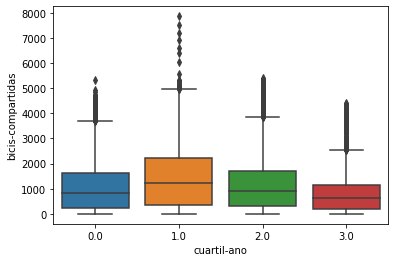

In [14]:
fig, ax = plt.subplots()
sns.boxplot(x = 'cuartil-ano', y = 'bicis-compartidas', data = df )

### Scatterplot

Un [diagrama de dispersión](https://es.wikipedia.org/wiki/Diagrama_de_dispersi%C3%B3n) o gráfica de dispersión o gráfico de burbujas es un tipo de diagrama matemático que utiliza las coordenadas cartesianas para mostrar los valores de dos variables para un conjunto de datos. 

Sirve basicamente para identificar el tipo de relación (si existe) entre dos variables cuantitativas.

Si existe un parámetro que se incrementa o disminuye de forma sistemática por el experimentador, se le denomina parámetro de control o variable independiente y habitualmente se representa a lo largo del eje horizontal (eje de las abscisas). La variable medida o dependiente usualmente se representa a lo largo del eje vertical (eje de las ordenadas). Si no existe una variable dependiente, cualquier variable se puede representar en cada eje y el diagrama de dispersión mostrará el grado de correlación (no causalidad) entre las dos variables. 

Podemos ver valores atipicos, los cuales merecen un analisis adicional. 

Ahora veamos otra forma de representar datos en un grafico con dos variables simultaneamente. 

[]

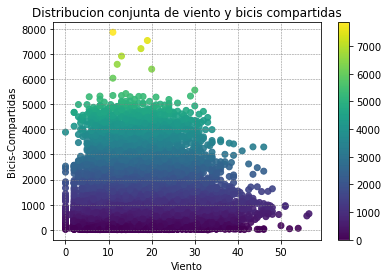

In [15]:
fig, ax = plt.subplots()
cs = ax.scatter(df['viento'], df['bicis-compartidas'], c = df['bicis-compartidas'], cmap='viridis', alpha=0.9)
ax.set_title('Distribucion conjunta de viento y bicis compartidas')
ax.set_xlabel('Viento')
fig.colorbar(cs, ax=ax)
ax.set_ylabel('Bicis-Compartidas')

ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.plot()

Mejorando el grafico anterior

[]

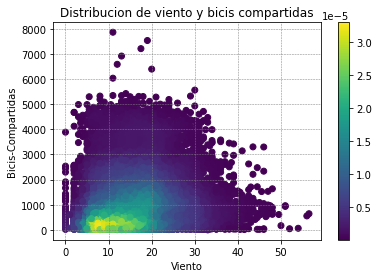

In [18]:
from scipy.stats import gaussian_kde

xy = np.vstack([df['viento'], df['bicis-compartidas']])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
cs = ax.scatter(df['viento'], df['bicis-compartidas'], c = z, label='viento vs bicis', cmap='viridis')

ax.set_title('Distribucion de viento y bicis compartidas' )
ax.set_xlabel('Viento')
fig.colorbar(cs, ax=ax)
ax.set_ylabel('Bicis-Compartidas')

ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.plot()

Estos gráficos son continuamente utilizados en el analisis estadistico porque nos permiten visualizar la relacion entre dos variables conjuntamente. Si vemoas una distribucion aleatorio donde no haya ningun patron, podemos decir que las variables no estan correlacionadas, pero si llegamos a identicarlo, podemos llegar a conclusiones mucho mas profundas, estadisticamente hablando entre las 2 variables.